In [130]:
#!conda install -c conda-forge cartopy --yes

In [133]:
import matplotlib.pyplot as plt

def generate_scatter_plot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(x_data, y_data)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    plt.show()

def generate_hexbin_plot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots(figsize=(10, 8))
    hb = ax.hexbin(x_data, y_data, gridsize=25, cmap='inferno')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    cb = fig.colorbar(hb)
    cb.set_label('Density')
    plt.show()

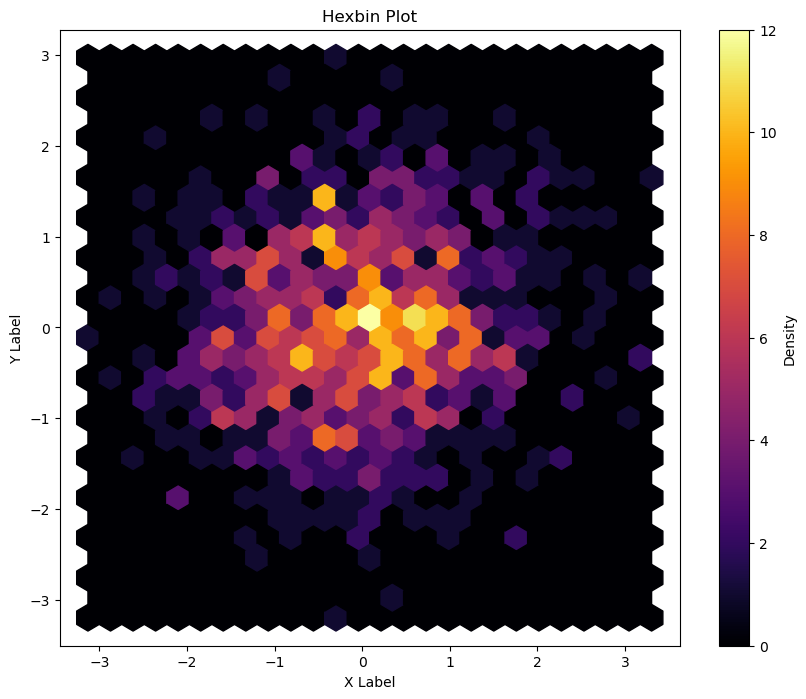

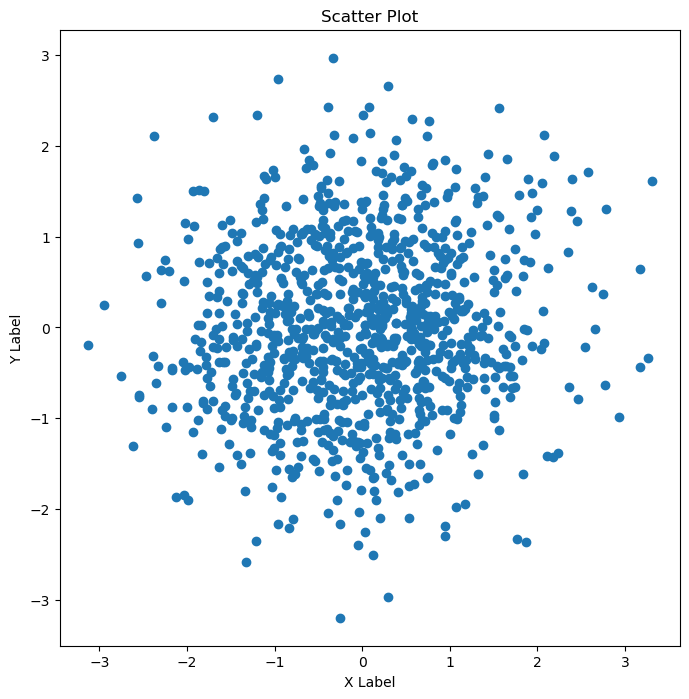

In [134]:
import numpy as np

# Generate random data
x_data = np.random.randn(1000)
y_data = np.random.randn(1000)

# Generate hexbin plot
generate_hexbin_plot(x_data, y_data, 'X Label', 'Y Label', 'Hexbin Plot')

# Generate scatter plot
generate_scatter_plot(x_data, y_data, 'X Label', 'Y Label', 'Scatter Plot')

In [29]:
import pandas as pd

def read_global_nighttime_lights(filename):
    """
    Reads the Global Nighttime Lights at 1km resolution dataset from the specified CSV file.
    
    Args:
        filename (str): The name of the CSV file to read.
    
    Returns:
        A pandas DataFrame containing the dataset.
    """
    # Use pandas to read the CSV file into a DataFrame, skipping over lines with formatting errors
    df = pd.read_csv(filename, error_bad_lines=False)
    
    # Return the DataFrame
    return df


In [30]:
filename = 'GaN2021.csv'
data = read_global_nighttime_lights(filename)


/var/folders/qb/zs9wwy7j3_n62q2dskb2cdqc0000gp/T/ipykernel_82546/3442759025.py:14: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(filename, error_bad_lines=False)
Skipping line 17634: expected 18 fields, saw 19
Skipping line 19373: expected 18 fields, saw 19
Skipping line 19431: expected 18 fields, saw 19



In [32]:
data.head()

,ID,ObsType,ObsID,Latitude,Longitude,Elevation(m),LocalDate,LocalTime,UTDate,UTTime,LimitingMag,SQMReading,SQMSerial,CloudCover,Constellation,SkyComment,LocationComment,Country
0,245619,GAN,58426,14.0739,121.32500,124.2800,2021-01-01,20:23,2021-01-01,12:23,-9999,NaN,NaN,over 1/2 of sky,Taurus,overcast skies,urban area / two (2) CCTV camera lights and lo...,Philippines
1,245620,GAN,58432,48.6292,9.38716,368.3650,2021-01-01,19:54,2021-01-01,18:54,-9999,NaN,NaN,over 1/2 of sky,Taurus,Himmel stark bewlkt. nicht einmal der Mond kom...,lndlicher Ort liegt erhht zwischen zwei Stdten.,Germany
2,245621,GAN,58434,-33.9389,18.85090,98.6686,2021-01-01,21:19,2021-01-01,19:19,2,NaN,NaN,clear,Orion,NaN,NaN,South Africa
3,245622,GAN,58437,39.0393,-77.50500,89.1158,2021-01-01,18:03,2021-01-01,23:03,2,NaN,NaN,clear,Perseus,NaN,Suburban area- Trees in the way.,United States - Virginia
4,245623,SQM,58439,36.0247,-115.01600,605.6450,2021-01-01,18:59,2021-01-02,02:59,3,17.96,NaN,clear,Orion,NaN,NaN,United States - Nevada


In [128]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_light_pollution_hexbin(dataframe):
    """
    Plots a hexbin map of the Latitude and Longitude columns from a Pandas DataFrame,
    with the median of LimitingMag values used to color the hexbins.

    Args:
        dataframe (Pandas DataFrame): The DataFrame containing the data to plot.
    """
    # Define the hexbin parameters
    gridsize = 100
    mincnt = 1

    # Extract the latitude, longitude, and limiting magnitude data from the DataFrame
    lats = dataframe['Latitude'].values
    lons = dataframe['Longitude'].values
    limiting_mag = dataframe['LimitingMag'].values

    # Create a hexbin plot of the data
    fig, ax = plt.subplots(figsize=(20, 16), subplot_kw=dict(projection=ccrs.PlateCarree()))
    hb = ax.hexbin(lons, lats, C=limiting_mag, reduce_C_function=np.median, gridsize=gridsize, cmap='inferno', mincnt=mincnt, alpha=1.0, transform=ccrs.PlateCarree())

    # Add country boundaries
    countries = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_countries',
        scale='50m',
        facecolor='none')
    ax.add_feature(countries, edgecolor='white', linewidth=1)

    # Set the background color to dark blue
    ax.set_facecolor('navy')

    # Set the title and axis labels
    ax.set_title('Hexbin Map of Global Light Pollution', fontsize=18)
    ax.set_xlabel('Longitude', fontsize=14)
    ax.set_ylabel('Latitude', fontsize=14)

    # Add gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}
    
    # Show the legend on the right side
    plt.subplots_adjust(right=0.85)
    ax_legend = plt.axes([0.87, 0.1, 0.02, 0.8])
    plt.colorbar(hb, cax=ax_legend)

    # Show the plot
    plt.show()


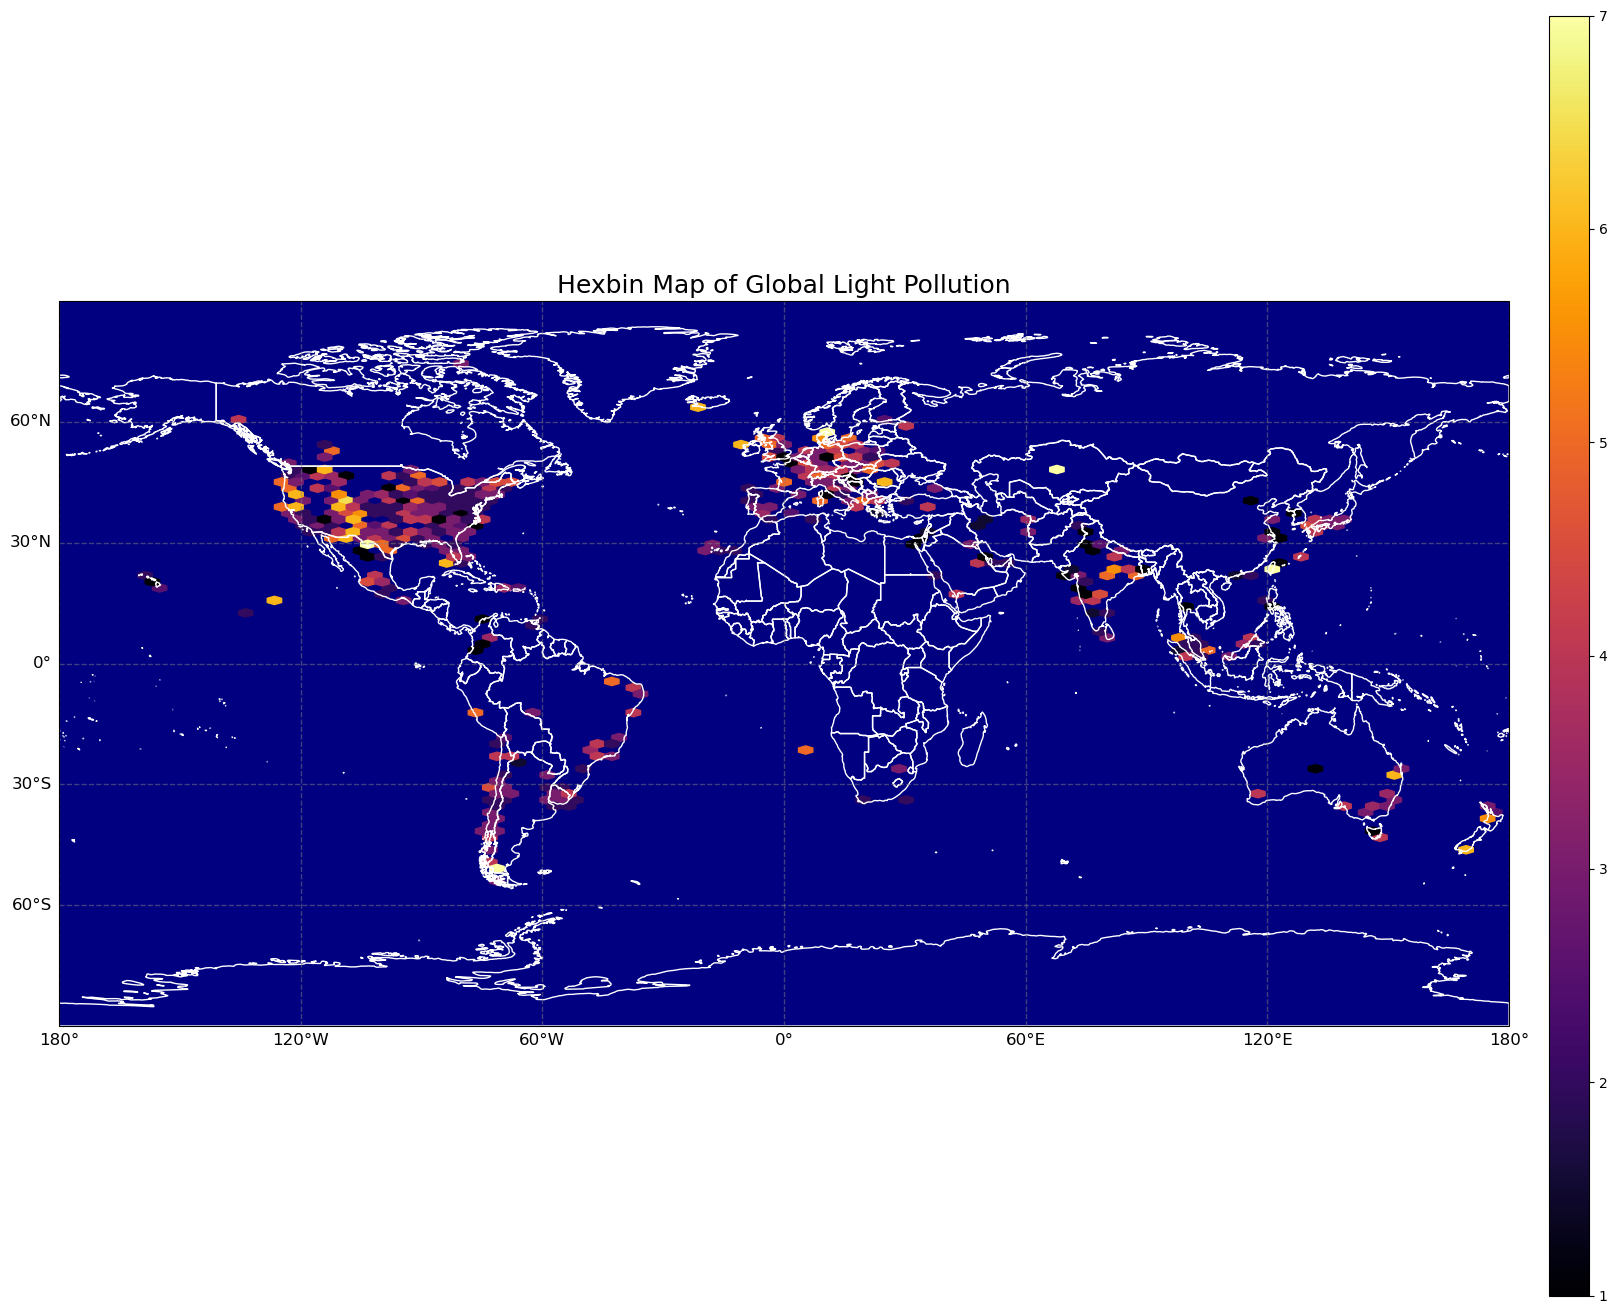

In [129]:
plot_light_pollution_hexbin(data)

In [131]:
import matplotlib.colors as colors

def plot_light_pollution_hexbin_us(dataframe):
    """
    Plots a hexbin map of the Latitude and Longitude columns from a Pandas DataFrame,
    with the LimitingMag values used to color the hexbins.

    Args:
        dataframe (Pandas DataFrame): The DataFrame containing the data to plot.
    """
    # Define the hexbin parameters
    gridsize = 150
    mincnt = 1
    
    # Cap the LimitingMag between [0, 10]
    dataframe['LimitingMag'] = dataframe['LimitingMag'].clip(lower=1, upper=7)

    # Extract the latitude, longitude, and limiting magnitude data from the DataFrame
    lats = dataframe['Latitude'].values
    lons = dataframe['Longitude'].values
    limiting_mag = dataframe['LimitingMag'].values

    # Define a custom colormap with reversed order
    cmap = plt.cm.get_cmap('inferno_r')
    norm = colors.Normalize(vmin=1, vmax=7)

    # Create a hexbin plot of the data
    fig, ax = plt.subplots(figsize=(12, 15), subplot_kw=dict(projection=ccrs.PlateCarree()))
    ax.set_extent([-130, -60, 20, 50], crs=ccrs.PlateCarree())  # Set extent to US region
    hb = ax.hexbin(lons, lats, C=limiting_mag, gridsize=gridsize, cmap=cmap, norm=norm, mincnt=mincnt, alpha=0.9, transform=ccrs.PlateCarree())

    # Add country boundaries
    countries = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_countries',
        scale='50m',
        facecolor='none')
    ax.add_feature(countries, edgecolor='white', linewidth=1)
    
    # Set the background color to dark blue
    ax.set_facecolor('#041A40')

    # Set the title and axis labels
    ax.set_title('Hexbin Map of US LimitingMag', fontsize=18)
    ax.set_xlabel('Longitude', fontsize=14)
    ax.set_ylabel('Latitude', fontsize=14)

    # Add gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}
    
    # Show the legend on the right side
    #plt.subplots_adjust(bottom=0.2)
    #ax_legend = plt.axes([0.25, 0.05, 0.5, 0.05])
    #plt.colorbar(hb, cax=ax_legend, orientation='horizontal')

    # Show the plot
    plt.show()



/var/folders/qb/zs9wwy7j3_n62q2dskb2cdqc0000gp/T/ipykernel_82546/2239242640.py:24: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



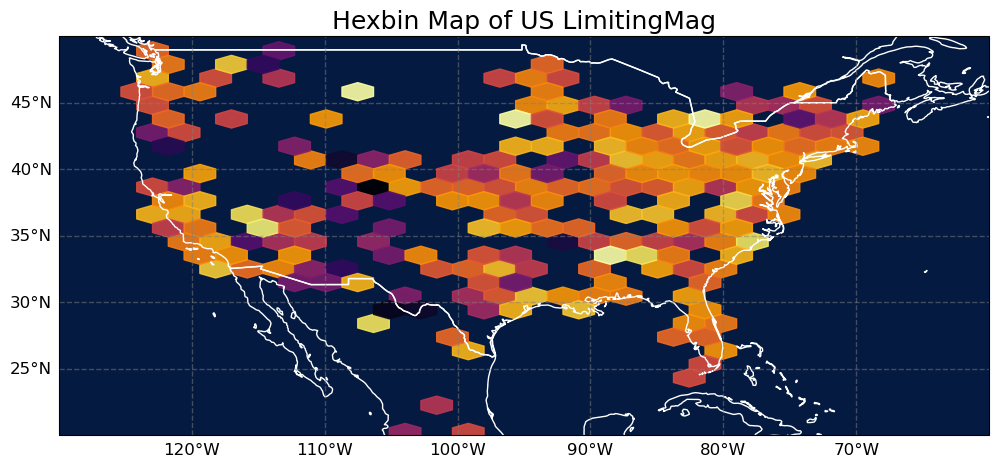

In [132]:
plot_light_pollution_hexbin_us(data)